In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [3]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

In [6]:
# Loading Data
df = pd.read_csv('diabetes.csv')
# Getting dataframe columns names
df_name=df.columns

In [7]:
# Analyze Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


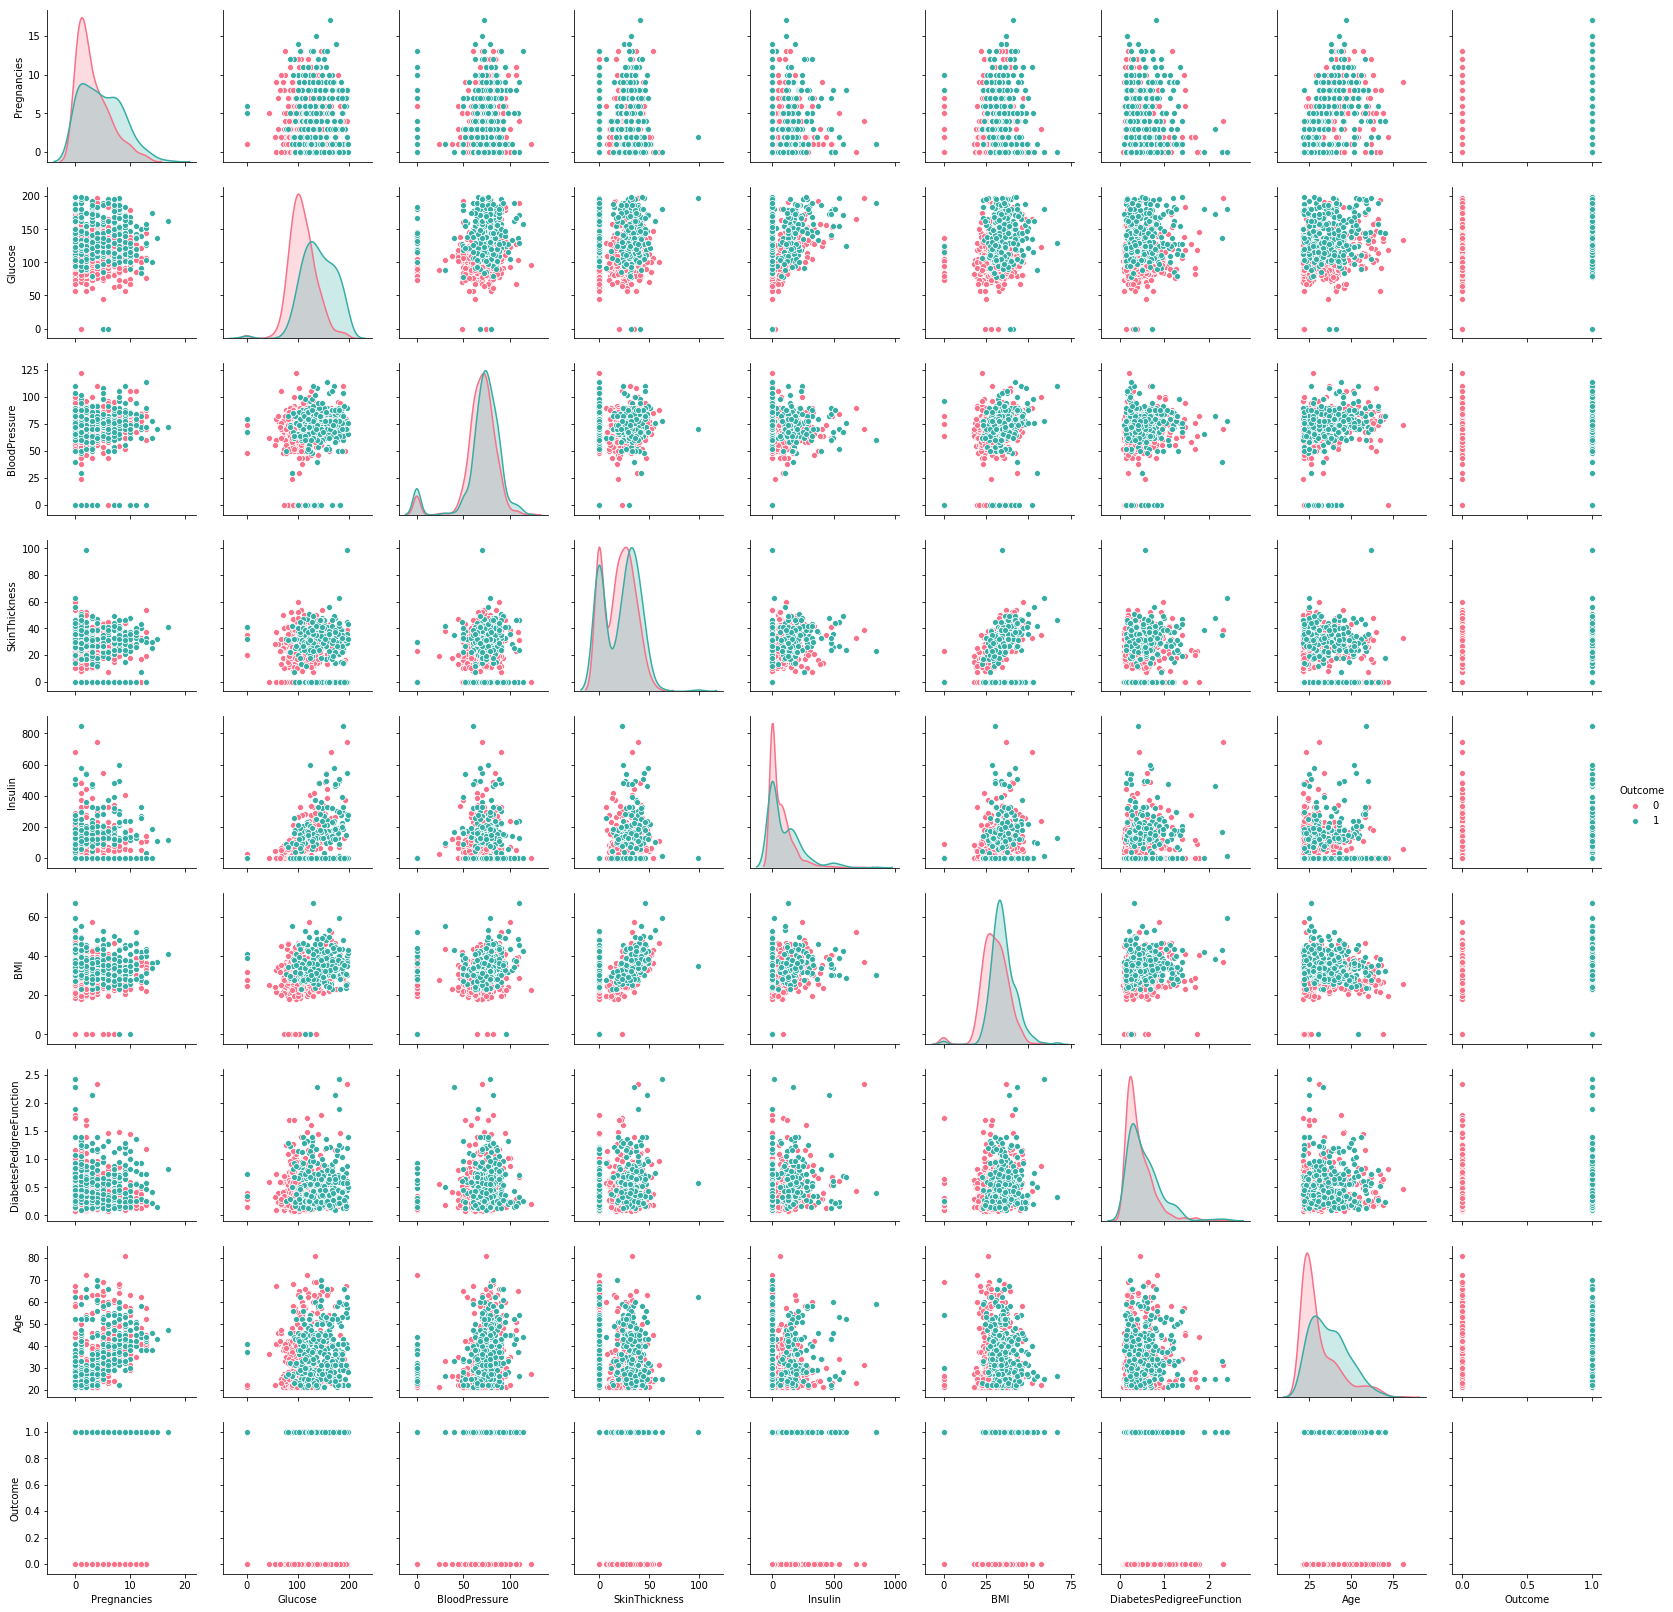

In [11]:
# Data Visualization

g = sns.pairplot(df, hue="Outcome", palette="husl")

In [24]:
def plotHist(df,nameOfFeature):
    cls_train = df[nameOfFeature]
    data_array = cls_train
    hist_data = np.histogram(data_array)
    binsize = .5

    trace1 = go.Histogram(
        x=data_array,
        histnorm="",
        name='Histogram of Wind Speed',
        autobinx=False,
        xbins=dict(
            start=df[nameOfFeature].min()-1,
            end=df[nameOfFeature].max()+1,
            size=binsize
        )
    )

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3,
         title='The distribution of ' + nameOfFeature,
        xaxis=dict(
            title=nameOfFeature,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Number of labels',
            titlefont=dict(
                family='Courier New, monospace',
                size=19,
                color='#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=trace_data, layout=layout)
    py.iplot(fig)

In [26]:
plotHist(df,'Pregnancies')

In [36]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[feature]))
        print("{0} var  : ".format(target), np.var(df[feature]))
        print("{0} skew : ".format(target), skew(df[feature]))
        print("{0} kurt : ".format(target), kurtosis(df[feature]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,feature)

In [55]:
for i in range(8):
    plotBarCat(df,df_name[i],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Pregnancies mean :  3.8450520833333335
Pregnancies var  :  11.33927239312061
Pregnancies skew :  0.8999119408414357
Pregnancies kurt :  0.15038273760948462
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Glucose mean :  120.89453125
Glucose var  :  1020.9172617594401
Glucose skew :  0.17341395519987735
Glucose kurt :  0.6288133337300685
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
BloodPressure mean :  69.10546875
BloodPressure var  :  374.1594492594401
BloodPressure skew :  -1.8400052311728738
BloodPressure kurt :  5.138690662525438
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
SkinThickness mean :  20.536458333333332
SkinThickness var  :  254.14189995659854
SkinThickness skew :  0.109158762323673
SkinThickness kurt :  -0.5244944887652805
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Insulin mean :  79.79947916666667
Insulin var  :  13263.886874728778
Insulin skew :  2.2678104585131753
Insulin kurt :  7.159574916971424
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
BMI mean :  31.992578124999977
BMI var  :  62.0790464782714
BMI skew :  -0.42814327880861786
BMI kurt :  3.2612574203612645
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
DiabetesPedigreeFunction mean :  0.4718763020833327
DiabetesPedigreeFunction var  :  0.10963569693840873
DiabetesPedigreeFunction skew :  1.9161592037386292
DiabetesPedigreeFunction kurt :  5.550792047551203
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Age mean :  33.240885416666664
Age var  :  138.12296379937058
Age skew :  1.127389259531697
Age kurt :  0.6311769413798585
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


###### Outliers investigation

In [112]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")


In [114]:
for i in range(8):
    OutLiersBox(df,df_name[i])

In [122]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            contamination=outliers_fraction)}

    
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))


    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation

        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit_predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred) 
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            subplot = plt.subplot(2, 2, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
 
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

One-Class SVM {-1: 197, 1: 571}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 78, 1: 690}


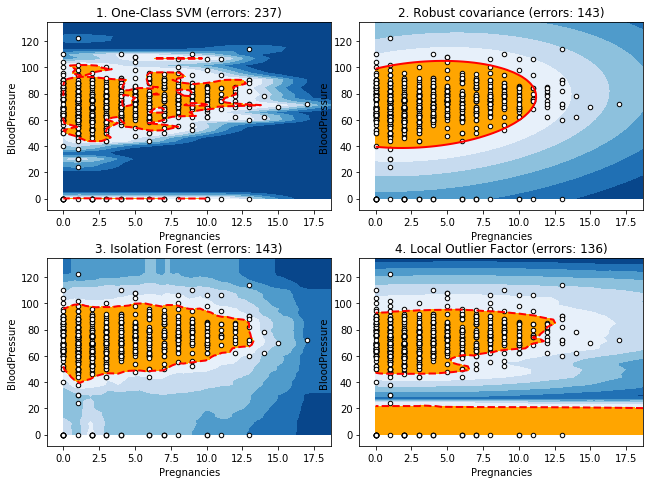

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_BloodPressureOne-Class SVM,Pregnancies_BloodPressureRobust covariance,Pregnancies_BloodPressureIsolation Forest,Pregnancies_BloodPressureLocal Outlier Factor
0,6,148,72,35,0,33.6,0.627,50,1,-1,1,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1,1,1,1
2,8,183,64,0,0,23.3,0.672,32,1,1,1,1,-1
3,1,89,66,23,94,28.1,0.167,21,0,1,1,1,1
4,0,137,40,35,168,43.1,2.288,33,1,-1,1,-1,-1
5,5,116,74,0,0,25.6,0.201,30,0,1,1,1,1
6,3,78,50,32,88,31.0,0.248,26,1,-1,1,1,1
7,10,115,0,0,0,35.3,0.134,29,0,-1,-1,-1,1
8,2,197,70,45,543,30.5,0.158,53,1,1,1,1,1
9,8,125,96,0,0,0.0,0.232,54,1,-1,1,1,-1


In [123]:
OutLierDetection(df,'Pregnancies','BloodPressure',.1)

In [124]:
# Load libraries

from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [125]:
X =  df[df_name[0:8]]
Y = df[df_name[8]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df['Outcome'])

In [126]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [127]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [128]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [129]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)



LR: 0.758904 (0.049893)
LDA: 0.760510 (0.034873)
KNN: 0.698048 (0.041546)
CART: 0.706248 (0.039215)
NB: 0.744962 (0.041601)
SVM: 0.651037 (0.003678)
AB: 0.760687 (0.063215)
GBM: 0.760659 (0.034307)
RF: 0.730927 (0.029133)
ET: 0.724297 (0.069822)


In [132]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [133]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

,Model,Score
0,LR,0.7589
1,LDA,0.7605
2,KNN,0.6980
3,CART,0.7062
4,NB,0.7450
5,SVM,0.6510
6,AB,0.7607
7,GBM,0.7607
8,RF,0.7309
9,ET,0.7243


In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))
    

    return pipelines 

In [145]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.762264 (0.032245)
standardLDA: 0.760510 (0.034873)
standardKNN: 0.708568 (0.049209)
standardCART: 0.721977 (0.060474)
standardNB: 0.744962 (0.041601)
standardSVM: 0.755248 (0.025784)
standardAB: 0.760687 (0.063215)
standardGBM: 0.758905 (0.033220)
standardRF: 0.739635 (0.044521)
standardET: 0.729293 (0.042606)


,Model,Score,Model,Score
0,LR,0.7589,standardLR,0.7623
1,LDA,0.7605,standardLDA,0.7605
2,KNN,0.6980,standardKNN,0.7086
3,CART,0.7062,standardCART,0.7220
4,NB,0.7450,standardNB,0.7450
5,SVM,0.6510,standardSVM,0.7552
6,AB,0.7607,standardAB,0.7607
7,GBM,0.7607,standardGBM,0.7589
8,RF,0.7309,standardRF,0.7396
9,ET,0.7243,standardET,0.7293


In [146]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.757121 (0.041496)
minmaxLDA: 0.760510 (0.034873)
minmaxKNN: 0.717189 (0.052617)
minmaxCART: 0.713297 (0.054811)
minmaxNB: 0.744962 (0.041601)
minmaxSVM: 0.743116 (0.031028)
minmaxAB: 0.760687 (0.063215)
minmaxGBM: 0.762354 (0.031305)
minmaxRF: 0.734703 (0.048256)
minmaxET: 0.727417 (0.044852)


,Model,Score,Model,Score,Model,Score
0,LR,0.7589,standardLR,0.7623,minmaxLR,0.7571
1,LDA,0.7605,standardLDA,0.7605,minmaxLDA,0.7605
2,KNN,0.6980,standardKNN,0.7086,minmaxKNN,0.7172
3,CART,0.7062,standardCART,0.7220,minmaxCART,0.7133
4,NB,0.7450,standardNB,0.7450,minmaxNB,0.7450
5,SVM,0.6510,standardSVM,0.7552,minmaxSVM,0.7431
6,AB,0.7607,standardAB,0.7607,minmaxAB,0.7607
7,GBM,0.7607,standardGBM,0.7589,minmaxGBM,0.7624
8,RF,0.7309,standardRF,0.7396,minmaxRF,0.7347
9,ET,0.7243,standardET,0.7293,minmaxET,0.7274


In [150]:
df_t = df.copy()
df_t_name = df_t.columns

In [151]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

In [152]:
feature_number = 0
OutLiersBox(df,df_name[feature_number])

In [153]:
df_clean = TurkyOutliers(df_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features each.


In [154]:
feature_number = 1
OutLiersBox(df,df_name[feature_number])

In [155]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]
New dataset with removed outliers has 759 samples with 9 features each.


In [156]:
feature_number = 2
OutLiersBox(df,df_name[feature_number])

In [157]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 714 samples with 9 features each.


In [158]:
feature_number = 3
OutLiersBox(df,df_name[feature_number])

In [159]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has 713 samples with 9 features each.


In [160]:
feature_number = 4
OutLiersBox(df,df_name[feature_number])

In [161]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 27 and outliers: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 686 samples with 9 features each.


In [162]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])

In [163]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 10 and outliers: [ 0.  49.7 53.2  0.  50.  52.9  0.  59.4 57.3  0. ]
New dataset with removed outliers has 676 samples with 9 features each.


In [164]:
feature_number = 6
OutLiersBox(df,df_name[feature_number])

In [165]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 29 and outliers: [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.189 1.321 1.224 1.318 1.213
 1.353 1.224 1.391 1.476 1.268 1.6   1.191 1.251 1.699 1.258 1.282 1.698
 1.461 1.292 1.394 1.174 1.182]
New dataset with removed outliers has 647 samples with 9 features each.


In [166]:
feature_number = 7
OutLiersBox(df,df_name[feature_number])

In [167]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 11 and outliers: [69 66 67 81 67 66 67 66 70 68 66]
New dataset with removed outliers has 636 samples with 9 features each.


In [168]:
feature_number = 8
OutLiersBox(df,df_name[feature_number])

In [169]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 636 samples with 9 features each.


# Cleaning report

In [170]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 768, new df shape: 636, we lost 132 rows, 17.1875% of our data


One-Class SVM {-1: 197, 1: 571}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 78, 1: 690}


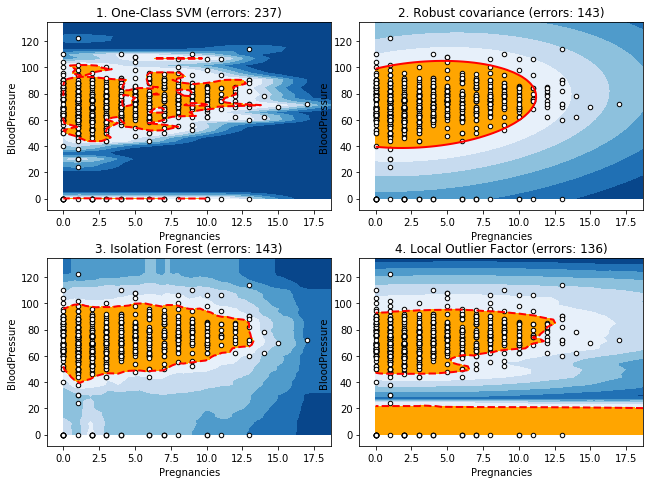

In [171]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

One-Class SVM {-1: 145, 1: 491}
Robust covariance {-1: 64, 1: 572}
Isolation Forest {-1: 64, 1: 572}
Local Outlier Factor {-1: 64, 1: 572}


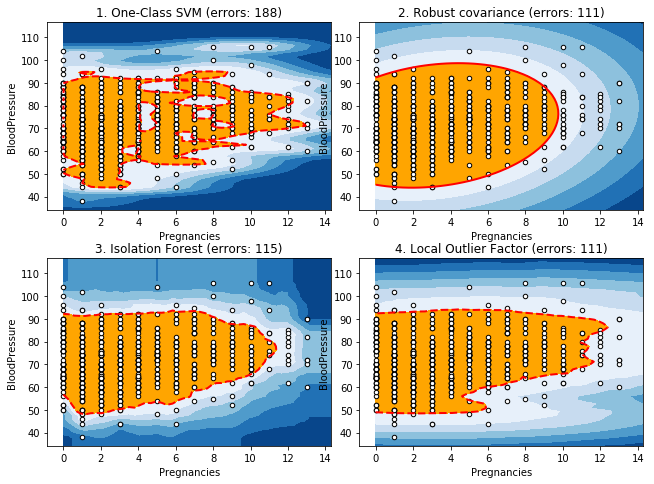

In [173]:
tt_t = OutLierDetection(df_clean,'Pregnancies','BloodPressure',.1)

In [174]:
df_clean_name = df_clean.columns
X_c =  df_clean[df_clean_name[0:8]]
Y_c = df_clean[df_clean_name[8]]
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df_clean['Outcome'])

In [175]:
names,results = BasedLine2(X_train_c, y_train_c,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels

minmaxLR: 0.775781 (0.043240)
minmaxLDA: 0.782117 (0.044300)
minmaxKNN: 0.743760 (0.064651)
minmaxCART: 0.683661 (0.076261)
minmaxNB: 0.758977 (0.048237)
minmaxSVM: 0.767447 (0.038062)
minmaxAB: 0.717085 (0.035524)
minmaxGBM: 0.754943 (0.049407)
minmaxRF: 0.761107 (0.053194)
minmaxET: 0.752729 (0.044849)


,Model,Score,Model,Score,Model,Score,Model,Score
0,LR,0.7589,standardLR,0.7623,minmaxLR,0.7571,minmaxLR,0.7758
1,LDA,0.7605,standardLDA,0.7605,minmaxLDA,0.7605,minmaxLDA,0.7821
2,KNN,0.6980,standardKNN,0.7086,minmaxKNN,0.7172,minmaxKNN,0.7438
3,CART,0.7062,standardCART,0.7220,minmaxCART,0.7133,minmaxCART,0.6837
4,NB,0.7450,standardNB,0.7450,minmaxNB,0.7450,minmaxNB,0.7590
5,SVM,0.6510,standardSVM,0.7552,minmaxSVM,0.7431,minmaxSVM,0.7674
6,AB,0.7607,standardAB,0.7607,minmaxAB,0.7607,minmaxAB,0.7171
7,GBM,0.7607,standardGBM,0.7589,minmaxGBM,0.7624,minmaxGBM,0.7549
8,RF,0.7309,standardRF,0.7396,minmaxRF,0.7347,minmaxRF,0.7611
9,ET,0.7243,standardET,0.7293,minmaxET,0.7274,minmaxET,0.7527


###### FEATURE SELECTION

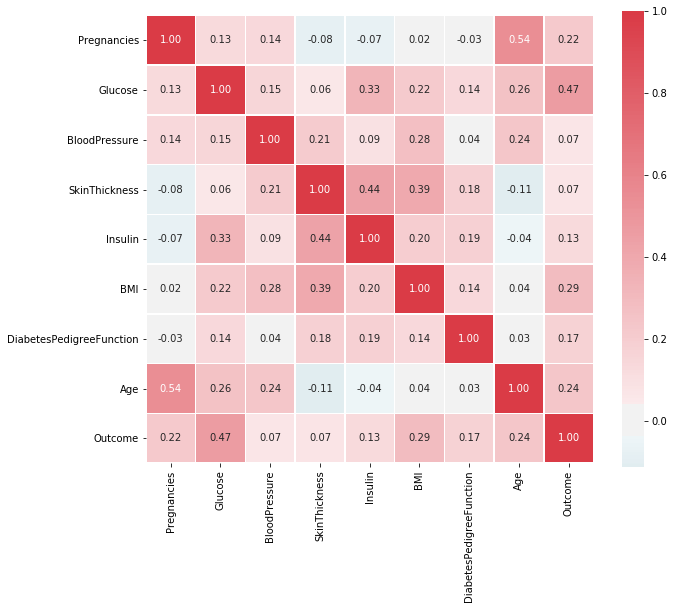

In [176]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df,x=True)


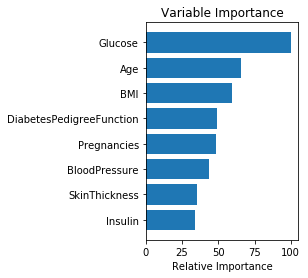

In [177]:
# Feature Importance

clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [178]:
df_feature_imp=df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

In [179]:
df_feature_imp_name = df_feature_imp.columns

In [180]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

In [181]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

minmaxLR: 0.779722 (0.050803)
minmaxLDA: 0.783326 (0.042172)
minmaxKNN: 0.755003 (0.049212)
minmaxCART: 0.698756 (0.046652)
minmaxNB: 0.783511 (0.047330)
minmaxSVM: 0.781538 (0.051953)
minmaxAB: 0.760728 (0.037347)
minmaxGBM: 0.760296 (0.037960)
minmaxRF: 0.747890 (0.046912)
minmaxET: 0.763471 (0.055271)


,Model,Score,Model,Score,Model,Score,Model,Score,Model,Score
0,LR,0.7589,standardLR,0.7623,minmaxLR,0.7571,minmaxLR,0.7758,minmaxLR,0.7797
1,LDA,0.7605,standardLDA,0.7605,minmaxLDA,0.7605,minmaxLDA,0.7821,minmaxLDA,0.7833
2,KNN,0.6980,standardKNN,0.7086,minmaxKNN,0.7172,minmaxKNN,0.7438,minmaxKNN,0.7550
3,CART,0.7062,standardCART,0.7220,minmaxCART,0.7133,minmaxCART,0.6837,minmaxCART,0.6988
4,NB,0.7450,standardNB,0.7450,minmaxNB,0.7450,minmaxNB,0.7590,minmaxNB,0.7835
5,SVM,0.6510,standardSVM,0.7552,minmaxSVM,0.7431,minmaxSVM,0.7674,minmaxSVM,0.7815
6,AB,0.7607,standardAB,0.7607,minmaxAB,0.7607,minmaxAB,0.7171,minmaxAB,0.7607
7,GBM,0.7607,standardGBM,0.7589,minmaxGBM,0.7624,minmaxGBM,0.7549,minmaxGBM,0.7603
8,RF,0.7309,standardRF,0.7396,minmaxRF,0.7347,minmaxRF,0.7611,minmaxRF,0.7479
9,ET,0.7243,standardET,0.7293,minmaxET,0.7274,minmaxET,0.7527,minmaxET,0.7635


###### ALGORITHM TUNING

In [182]:
df_unscaled = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_imp_scaled_name = df_unscaled.columns

In [183]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:4]
Y =  df_imp_scaled[:,4]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,4])

In [184]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [185]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    

In [187]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

###### Logistic Regression

In [188]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [189]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.790210 using {'C': 0.7678243129497218, 'penalty': 'l1'}


In [190]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [191]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

prediction on test set is: 0.84375


###### KNN

In [193]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [194]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))

Best: 0.809441 using {'n_neighbors': 15}
prediction on test set is: 0.828125


###### SVC

In [195]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [196]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

Best: 0.788462 using {'C': 1.7, 'kernel': 'linear'}
prediction on test set is: 0.84375


###### Decision Tree

In [201]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [202]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [203]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_CART).mean(),7))

Best: 0.770979 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 3}
prediction on test set is: 0.78125


###### AdaBoostClassifier

In [206]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)


In [207]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_sc,y_train_sc,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_Ad).mean(),7))

Best: 0.798951 using {'learning_rate': 0.05, 'n_estimators': 150}
prediction on test set is: 0.8125


###### Gradient Boosting

In [204]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [205]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))


Best: 0.774476 using {'learning_rate': 0.01, 'n_estimators': 100}
prediction on test set is: 0.8125


###### RandomForest

In [208]:
n_estimators_value = [50,100,150,200,250,300]
criterion_val = ["gini", "entropy"]

param_grid = dict(criterion=criterion_val, n_estimators=n_estimators_value)

In [209]:
model_RF = RandomForestClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_RF,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))


Best: 0.777972 using {'criterion': 'entropy', 'n_estimators': 150}
prediction on test set is: 0.765625


###### VOTING ENSEMBLE

In [210]:
from sklearn.ensemble import VotingClassifier

In [211]:
param = {'C': 0.7678243129497218, 'penalty': 'l1'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

In [212]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]

In [214]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

;

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

Accuracy on train:  0.7974537637196439
Accuracy on test: 0.828125


C:\Users\errit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



''

In [215]:
def get_models():
    """Generate a library of base learners."""
    param = {'C': 0.7678243129497218, 'penalty': 'l1'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 1.7, 'kernel': 'linear', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 100}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    model8 = RandomForestClassifier()

    model9 = ExtraTreesClassifier()

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }

    return models

###### Error Corrolation

In [216]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [217]:
models = get_models()
P = train_predict(models,X_train_sc,X_test_sc,y_train_sc,y_test_sc)

Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Done.



twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
[MLENS] backend: threading


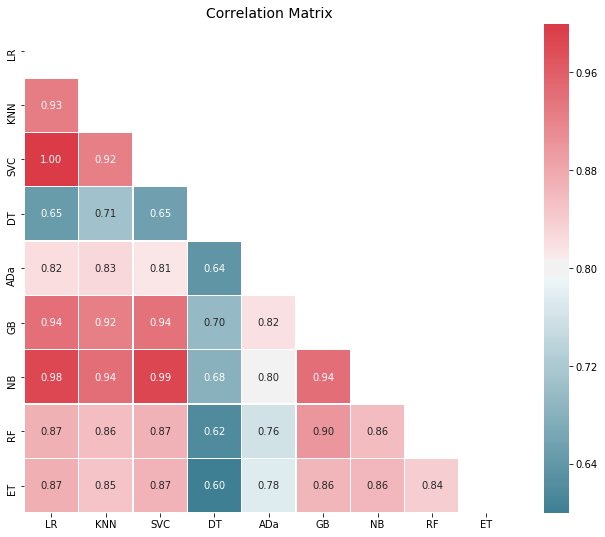

In [224]:
! pip install mlens
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)

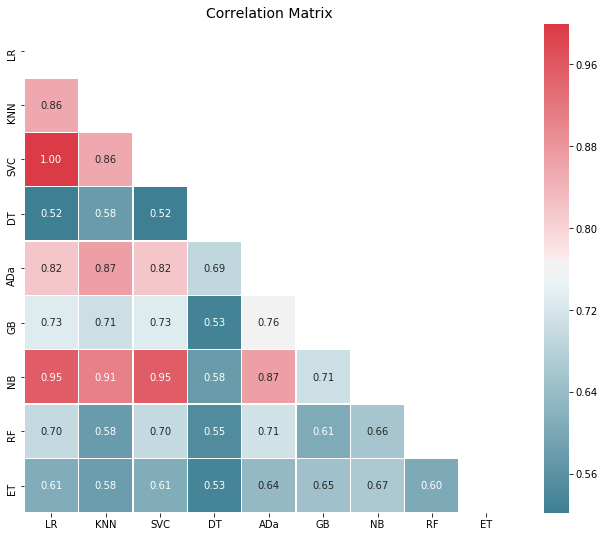

In [225]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test_sc).corr(), inflate=False)

###### STACKING

In [226]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=SEED
)

In [230]:
base_learners

{'LR': LogisticRegression(C=0.7678243129497218, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 'KNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=15, p=2,
            weights='uniform'),
 'SVC': SVC(C=1.7, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=True, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'DT': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
             max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             pr

In [227]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train_sc, y_train_sc)

# Predict the test set
p_sl = sl.predict_proba(X_test_sc)

# print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test_sc, p_sl[:, 1]))


Fitting 2 layers
Processing layer-1             done | 00:00:14
Processing layer-2             done | 00:00:02
Fit complete                        | 00:00:18

Predicting 2 layers
Processing layer-1             done | 00:00:11
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:13


In [ ]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [242]:
print("\nSuper Learner Accuracy score: %.8f"%((y_test_sc== pp).mean()))


Super Learner Accuracy score: 0.85937500


We could reach 86 % accuracy
Now you can do more feature engineering
Tune better
Use XGBoost, LightGBM, Nueal Network and other boosting method to improve your result
Stack more diverse model
Use your creativity
Your comments is warmly welcome

In [234]:
(y_test_sc== pp).mean()

0.859375